In [25]:
from sklearn.datasets import load_iris
import pandas as pd

In [26]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
df = pd.DataFrame(iris.data, columns=[iris.feature_names])

X = df.drop(columns=["sepal length (cm)", "sepal width (cm)"], axis=1)
y = pd.DataFrame(iris.target, columns=["Target"])


C:\Users\kaush\AppData\Local\Temp\ipykernel_11128\2717924827.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns=["sepal length (cm)", "sepal width (cm)"], axis=1)


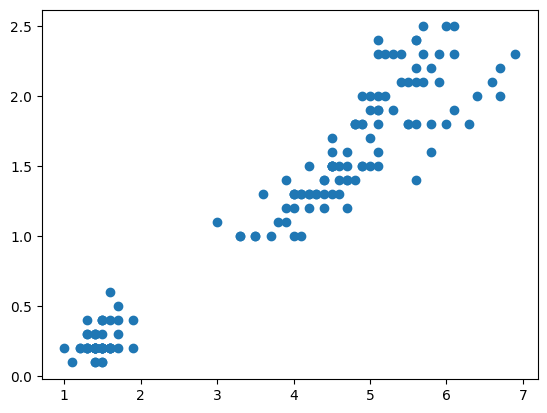

In [28]:
import matplotlib.pyplot as plt
plt.scatter(X["petal length (cm)"], X["petal width (cm)"])
plt.show()

In [29]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=3, max_iter=100, n_init="auto")

In [31]:
y_pred = model.fit_predict(X)
df["new_target"] = y_pred
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),new_target
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
5,5.4,3.9,1.7,0.4,2
6,4.6,3.4,1.4,0.3,2
7,5.0,3.4,1.5,0.2,2
8,4.4,2.9,1.4,0.2,2
9,4.9,3.1,1.5,0.1,2


[]

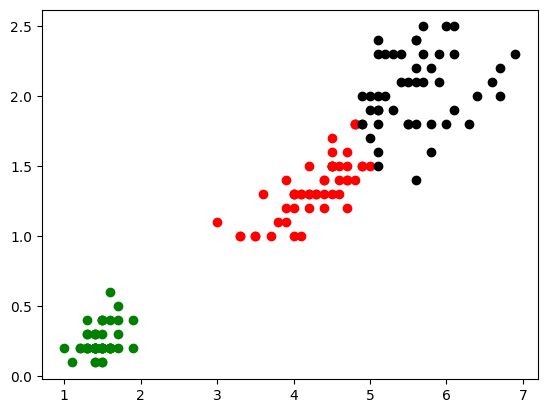

In [32]:
import matplotlib.pyplot as plt
df1 = df[y_pred == 0]
df2 = df[y_pred == 1]
df3 = df[y_pred == 2]
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="red")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color="black")
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], color="green")
plt.plot()

In [33]:
l1 = [len(df1), len(df2), len(df3)]
l2 = [len([x for x in y["Target"] if x == 0]), len([x for x in y["Target"] if x == 1]), len([x for x in y["Target"] if x == 2])]

count = 0
for i in range(len(l2)):
    count += abs(l1[i] - l2[i])

print("Inaccuracy: ", (count / sum(l2)) * 100, "%")

Inaccuracy:  2.666666666666667 %


In [34]:
k_val = range(1, 10)
sse = []
for k in k_val:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(X)
    sse.append(km.inertia_)

In [35]:
sse

[550.8953333333333,
 86.39021984551395,
 31.412885668276978,
 19.48300089968511,
 14.06794965675057,
 11.087223662604785,
 9.514445976051238,
 7.667019523446296,
 7.252298136645964]

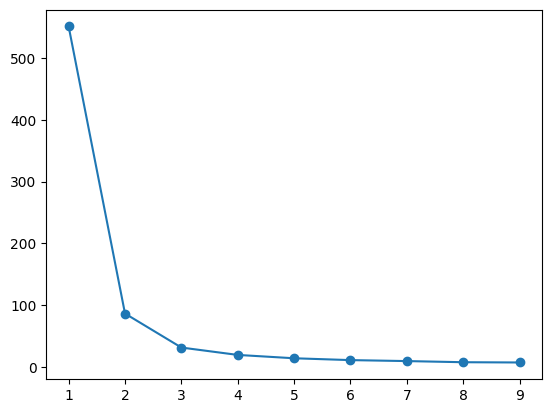

In [36]:
plt.plot(k_val, sse, marker="o")